In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy import stats
import re
from scipy.stats.stats import pearsonr
#import rpy2.robjects as robjects
import random
from statsmodels.stats.multitest import fdrcorrection
import os
import seaborn as sns
#import gseapy as gs
from scipy.stats import norm
import gseapy as gs

palette = {"chimp":"#95AAD3",
           "human":"#E31A1C",
          "Chimp":"#95AAD3",
           "Human":"#E31A1C"}

def read_file(file, output, gene, t, species = "Chimp", h = False):
    tpm = pd.read_csv(file, sep = "\t")
    tpm_gene = tpm.loc[gene]
    if h:
        for index in tpm_gene.index:
            if index.split("_")[1] != "D151":
                if "Human" in index or "human" in index:
                    output.append([tpm_gene[index], "Human", index.split("_")[1]])
                elif species in index or species.lower() in index:
                    output.append([tpm_gene[index], species, index.split("_")[1]])
                elif species == "Rhesus" and "Macaque" in index:
                    output.append([tpm_gene[index], species, t])
    else:
        for index in tpm_gene.index:
            if species in index or species.lower() in index:
                output.append([tpm_gene[index], species, t])
            elif species == "Rhesus" and "Macaque" in index:
                output.append([tpm_gene[index], species, t])
    return output

sns.set(font_scale = 1.5)

In [4]:
###Skip RA8 as it was not included in the folder we downloaded all data from.  Unclear why.

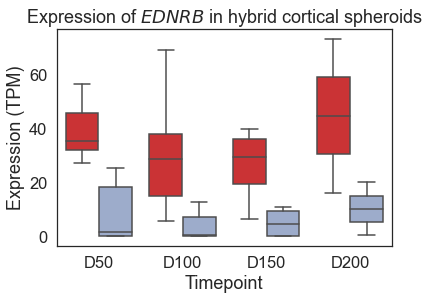

In [21]:
#Plot EDNRB
gene = "EDNRB"
def plot_hy_rachel(gene):
    sns.set(font_scale = 1.2)
    output = read_file("hyCS_allelic_TPM.rev.txt", [], gene, "Hybrid", h = True)
    df = pd.DataFrame(output)
    times = ["D50", "D100", "D150", "D200"]
    df.columns = ["Expression (TPM)", "Species", "Timepoint"]
    sns.set(font_scale = 1.5)
    sns.set_style("white")
    #ax = sns.swarmplot(x="Timepoint", y="TPM", hue = "Species", data=df, dodge = True, order = times, palette = palette)
    ax = sns.boxplot(x="Timepoint", y="Expression (TPM)", hue = "Species", data=df, showfliers=False, order = times, palette = palette)
    #plt.legend([],[], frameon=False)
    ax.set_xlabel("Timepoint")
    ax.set_title("Expression of $\it{" + gene + "}$ in hybrid cortical spheroids")
    sns.set_style("white")
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.legend([],[], frameon=False)
    ax
plot_hy_rachel(gene)
#boxprops={'facecolor':'None'}, 

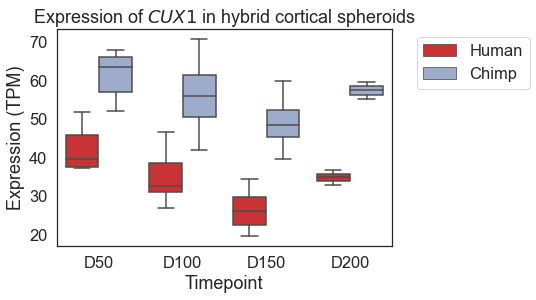

In [6]:
#Plot CUX1

plot_hy_rachel("CUX1")

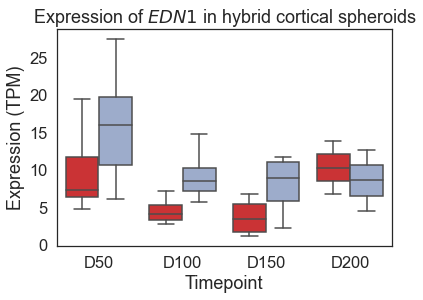

In [22]:
#Plot EDN1
plot_hy_rachel("EDN1")

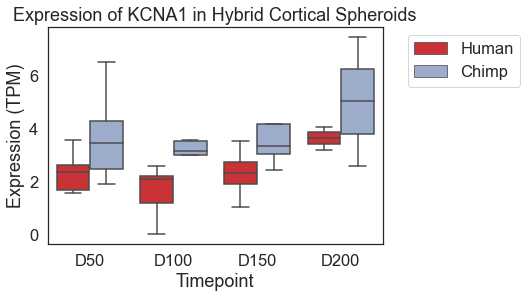

In [18]:
#Plot PTGDS
plot_hy_rachel("KCNA1")

In [8]:
def read_file_parental(file, output, gene, t, species = "Chimp", h = False):
    tpm = pd.read_csv(file, sep = "\t")
    tpm_gene = tpm.loc[gene]
    if h:
        for index in tpm_gene.index:
            if "H2" in index or "human" in index:
                output.append([tpm_gene[index], "Human", index.split("_")[1]])
            elif species == "Chimp" and "C3" in index:
                output.append([tpm_gene[index], species, index.split("_")[1]])
            elif species == "Rhesus" and "Macaque" in index:
                output.append([tpm_gene[index], species, t])
    else:
        for index in tpm_gene.index:
            if species in index or species.lower() in index:
                output.append([tpm_gene[index], species, t])
            elif species == "Rhesus" and "Macaque" in index:
                output.append([tpm_gene[index], species, t])
    return output


In [9]:
def fix(output):
    for i in output:
        if i[2] == "D52":
            i[2] = "D50/D52"
        elif i[2] == "D50":
            i[2] = "D50/D52"
        elif i[2] == "D102":
            i[2] = "D100/D102"
        elif i[2] == "D100":
            i[2] = "D100/D102"
        elif i[2] == "D151":
            i[2] = "D151/D155"
        elif i[2] == "D155":
            i[2] = "D151/D155"
        elif i[2] == "D201":
            i[2] = "D200/D201"
        elif i[2] == "D200":
            i[2] = "D200/D201"
    return output

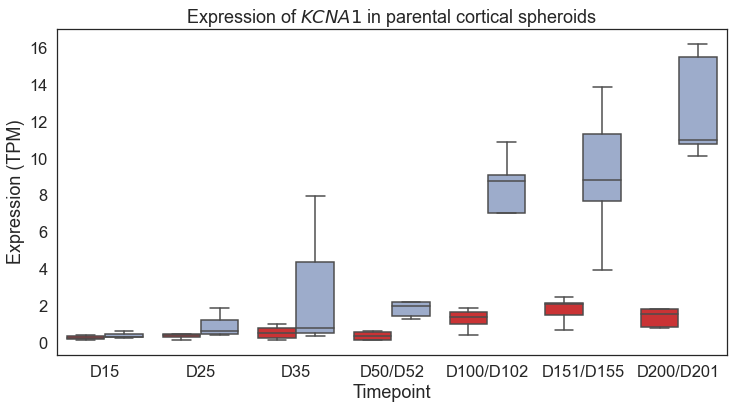

In [18]:
gene = "KCNA1"
def plot_par_rachel(gene):
    output = fix(read_file_parental("hcCS_tot_TPM.rev.txt", [], gene, "Hybrid", h = True))
    df = pd.DataFrame(output)
    fig, ax = plt.subplots(figsize=(12,6))
    times = ["D15", "D25", "D35", "D50/D52", "D100/D102", "D151/D155", "D200/D201"]
    df.columns = ["Expression (TPM)", "Species", "Timepoint"]
    sns.set_style("white")
    sns.set(font_scale = 1.5)
    ax = sns.boxplot(x="Timepoint", y="Expression (TPM)", hue = "Species", data=df, showfliers=False, order = times, palette = palette)
    #plt.legend([],[], frameon=False)
    ax.set_xlabel("Timepoint")
    ax.set_title("Expression of $\it{" + gene + "}$ in parental cortical spheroids")
    sns.set_style("white")
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.legend([],[], frameon=False)
    ax
plot_par_rachel(gene)

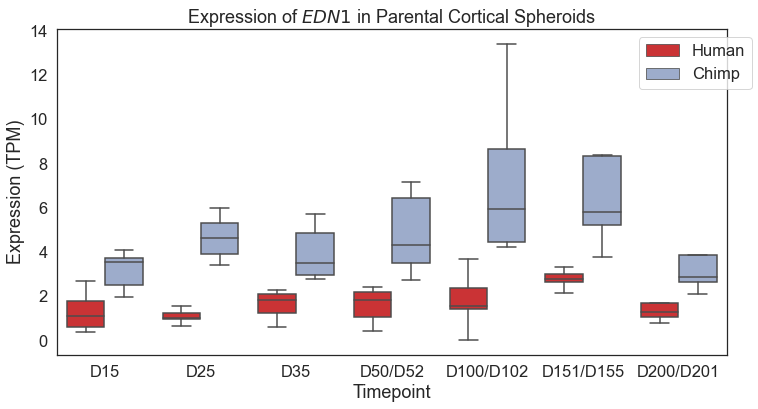

In [11]:
plot_par_rachel("EDN1")

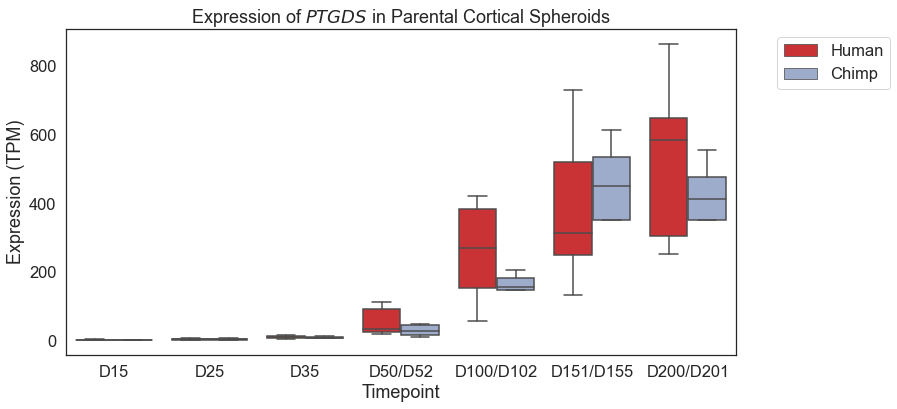

In [12]:
plot_par_rachel("PTGDS")

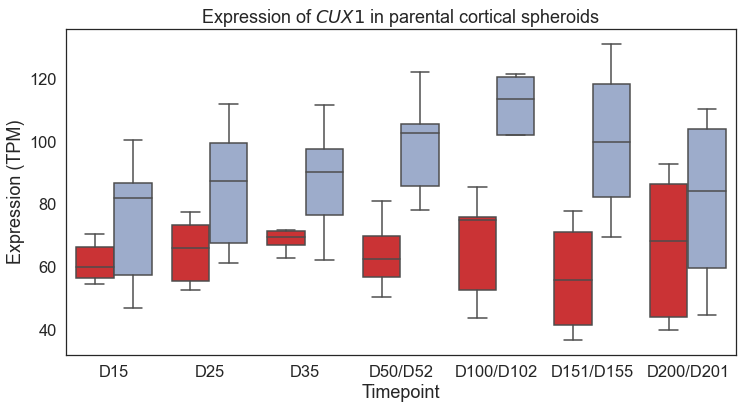

In [19]:
plot_par_rachel("CUX1")

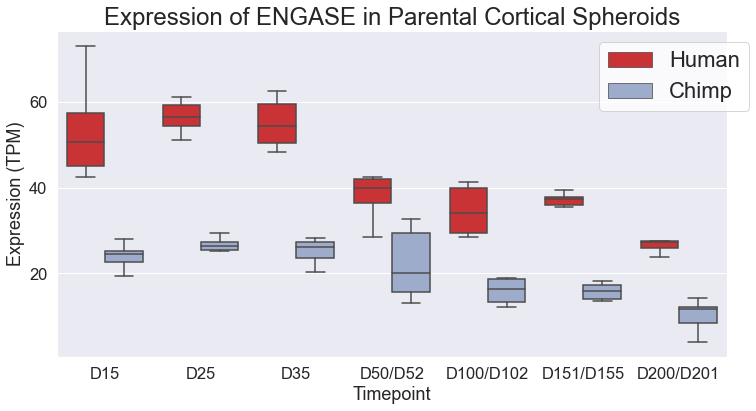

In [33]:
plot_par_rachel("ENGASE")